# Sanity Check for DICOM HDF5

Let's go through the HDF5 file we created with the [DICOM Processing Script](DICOM%20Processing%20Script.ipynb) notebook.

We want to make sure that neon can correctly load the data from the HDF5 file.

In [1]:
from neon.data import HDF5Iterator  # Neon's HDF5 data loader
from neon.backends import gen_backend

In [2]:
be = gen_backend(backend='cpu', batch_size=1)  

In [3]:
outFilename = 'dicom_out.h5'  # The name of our HDF5 data file

In [4]:
train_set = HDF5Iterator(outFilename)

In [5]:
train_set.get_description()

{'config': {'hdf_filename': 'dicom_out.h5', 'name': 'HDF5Iterator_0'},
 'type': 'neon.data.hdf5iterator.HDF5Iterator'}

In [6]:
train_set.ndata   # Number of patients in our dataset

5

In [7]:
train_set.lshape   # DICOM image tensor (C x H x W x D)

(1, 512, 512, 128)

In [8]:
from matplotlib import pyplot as plt, cm

%matplotlib inline

## Test what the tensor looks like to the backend

Evren confirmed that I should be iterating through the train_set so that it will show me how the tensor will look to the backend.

This looks right.

CPUTensor(base 0x10b8693f0) name:None shape:(33554432, 1) dtype:float32 strides:(4, 4) is_c_contiguous:True
CPUTensor(base 0x10b8693f0) name:None shape:(33554432, 1) dtype:float32 strides:(4, 4) is_c_contiguous:True
CPUTensor(base 0x10b8693f0) name:None shape:(33554432, 1) dtype:float32 strides:(4, 4) is_c_contiguous:True
CPUTensor(base 0x10b8693f0) name:None shape:(33554432, 1) dtype:float32 strides:(4, 4) is_c_contiguous:True
CPUTensor(base 0x10b8693f0) name:None shape:(33554432, 1) dtype:float32 strides:(4, 4) is_c_contiguous:True


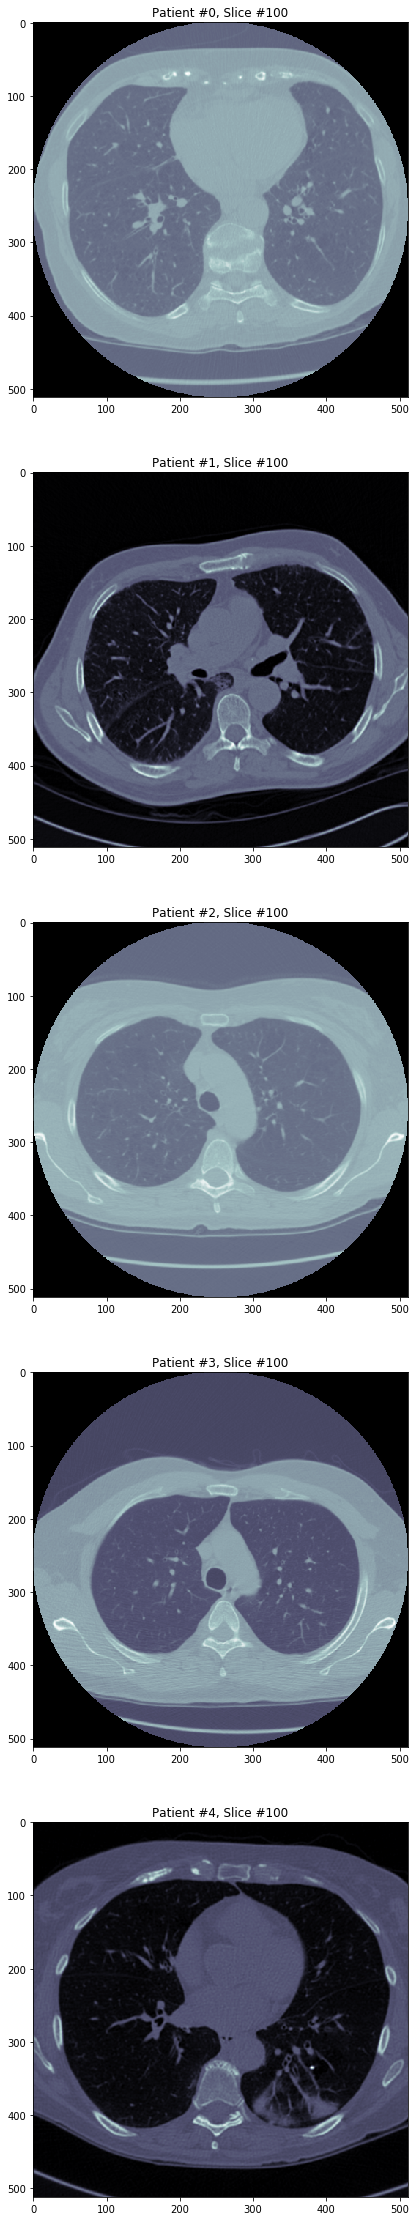

In [15]:
i = 0
plt.figure(figsize=(40,40))

for x, t in train_set:
    
    print(x)
    plt.subplot(train_set.ndata,1,i+1)
    
    # Print out slice #100 for eah patient
    plt.title('Patient #{}, Slice #{}'.format(i, 100))
    plt.imshow(x.get().reshape(512,512,128)[:,:,100], cmap=cm.bone); 
    
    i += 1

# Interactive display

Use the slider to go through the slices for patient 0.

In [10]:
from ipywidgets import interact

In [16]:
def displaySlice(sliceNo):
    plt.figure(figsize=[10,10]);
    plt.title('Patient #0, Slice #{}'.format(sliceNo));
    plt.imshow(train_set.inp[0,:].reshape(512,512,128)[:,:,sliceNo-1], cmap=cm.bone); 
    plt.show()
    
interact(displaySlice, sliceNo=(1,128,1));